In [1]:
import numpy as np
import pandas as pd

In [2]:
bank = pd.read_csv('bankloan.csv')

In [3]:
bank

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


> ## Data Splitting

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix

In [5]:
feature = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [6]:
X = bank[feature]
y = bank[target]

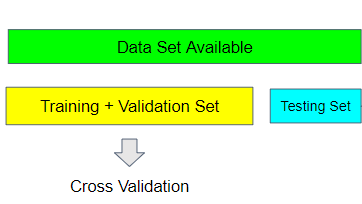

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=2020)

> ## Model Evaluation: Benchmark

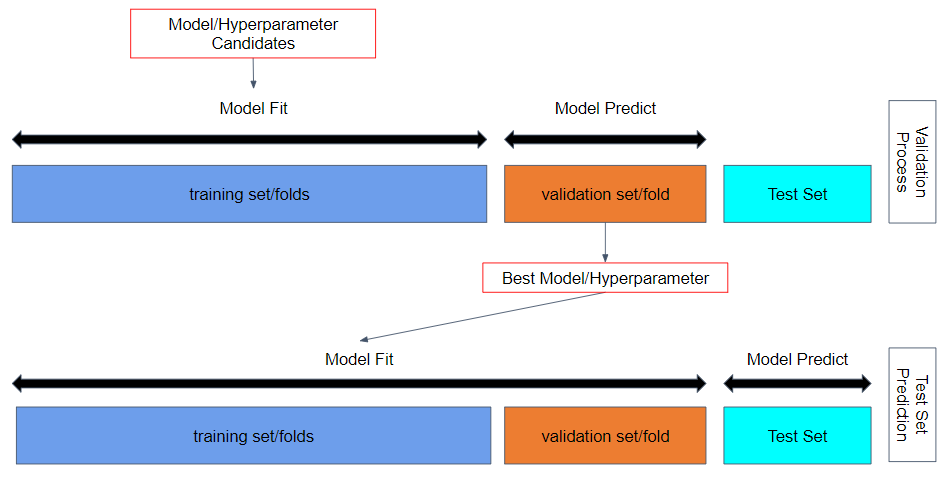

In [8]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [10]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [11]:
skfold = StratifiedKFold(n_splits = 5, random_state=24, shuffle=True) # meng-guarantee ratio y pada train dan val, sama

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='accuracy')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring='accuracy')
dtc_cv = cross_val_score(dtc, X_train_val, y_train_val, cv = skfold, scoring='accuracy')

In [12]:
print('CV Logistic Regression', logreg_cv)
print('CV KNN', knn_cv)
print('CV DecisionTree', dtc_cv)

CV Logistic Regression [0.78571429 0.76785714 0.75       0.84821429 0.83035714]
CV KNN [0.78571429 0.64285714 0.74107143 0.79464286 0.73214286]
CV DecisionTree [0.77678571 0.76785714 0.75       0.72321429 0.78571429]


In [13]:
print('CV Logistic Regression', logreg_cv.mean())
print('CV KNN', knn_cv.mean())
print('CV DecisionTree', dtc_cv.mean())

CV Logistic Regression 0.7964285714285715
CV KNN 0.7392857142857143
CV DecisionTree 0.7607142857142857


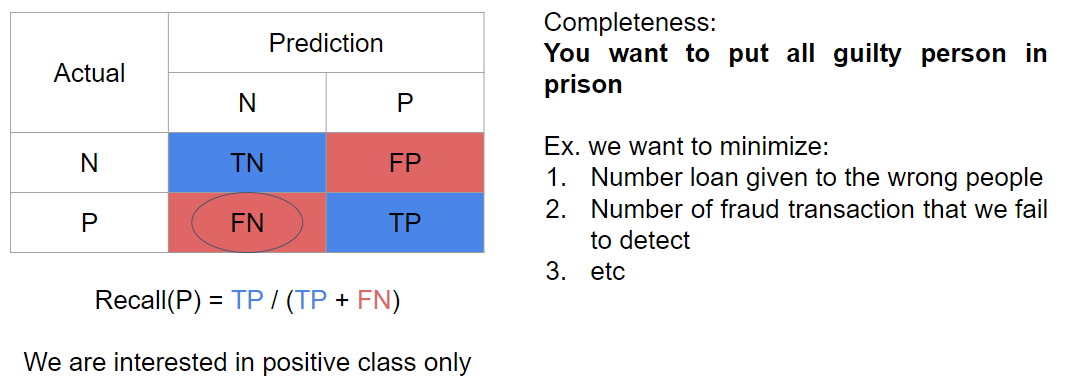

In [14]:
skfold = StratifiedKFold(n_splits = 5, random_state=24, shuffle=True) # meng-guarantee ratio y pada train dan val, sama

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='recall')
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring='recall')
dtc_cv = cross_val_score(dtc, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [15]:
print('CV Logistic Regression', logreg_cv)
print('CV KNN', knn_cv)
print('CV DecisionTree', dtc_cv)

CV Logistic Regression [0.43333333 0.51724138 0.31034483 0.48275862 0.44827586]
CV KNN [0.4        0.4137931  0.17241379 0.4137931  0.24137931]
CV DecisionTree [0.5        0.62068966 0.4137931  0.4137931  0.62068966]


In [16]:
print('CV Logistic Regression', logreg_cv.mean())
print('CV KNN', knn_cv.mean())
print('CV DecisionTree', dtc_cv.mean())

CV Logistic Regression 0.43839080459770124
CV KNN 0.32827586206896553
CV DecisionTree 0.5137931034482758


In [17]:
def model_evaluation_cv(model, metric):
    skfold = StratifiedKFold(n_splits = 5, random_state=24, shuffle=True)
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skfold, scoring = metric)
    return model_cv

In [18]:
def print_results(model_cv):
    print('CV Score:',model_cv)
    print('CV Score Mean:', model_cv.mean())
    print('CV Score Std:', model_cv.std())

In [19]:
model_cv = model_evaluation_cv(logreg, 'f1')
print_results(model_cv)

CV Score: [0.52       0.53571429 0.39130435 0.62222222 0.57777778]
CV Score Mean: 0.5294037267080745
CV Score Std: 0.07765953078015073


> ## MODEL PERFORMACE IN TEST SET

In [20]:
logreg.fit(X_train_val, y_train_val)

LogisticRegression()

In [21]:
y_pred = logreg.predict(X_test)

In [22]:
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

recall 0.4594594594594595
precision 0.7727272727272727
f1 0.576271186440678


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



In [24]:
confusion_matrix(y_test, y_pred)

array([[98,  5],
       [20, 17]], dtype=int64)

In [25]:
def make_confusion_matrix(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    conf_df = pd.DataFrame(
        {'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp]}, index = ['a_0', 'a_1', 'total_prediction']
    )
    conf_df['total_actual'] = conf_df['p_0'] + conf_df['p_1']
    return conf_df

In [26]:
make_confusion_matrix(confusion_matrix(y_test, y_pred))

,p_0,p_1,total_actual
a_0,98,5,103
a_1,20,17,37
total_prediction,118,22,140


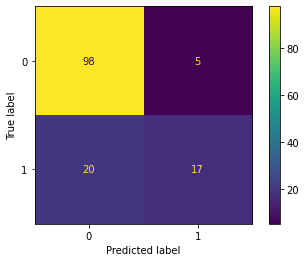

In [27]:
plot_confusion_matrix(logreg, X_test, y_test)

In [28]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, roc_curve, auc

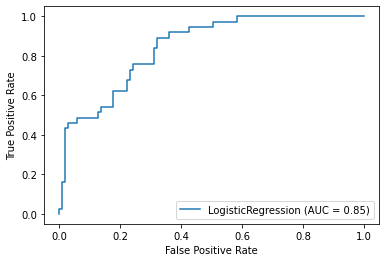

In [29]:
plot_roc_curve(logreg, X_test, y_test)

In [30]:
proba = logreg.predict_proba(X_test)
proba_1 = proba[:,1]
fpr, tpr, thr = roc_curve(y_test, proba_1)
auc_score = auc(fpr, tpr)

In [31]:
thr_df = pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'THR': thr})
thr_df.head()

,TPR,FPR,THR
0,0.000000,0.000000,1.946402
1,0.027027,0.000000,0.946402
2,0.027027,0.009709,0.936201
3,0.162162,0.009709,0.730020
4,0.162162,0.019417,0.703232


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

> ## ROC - AUC

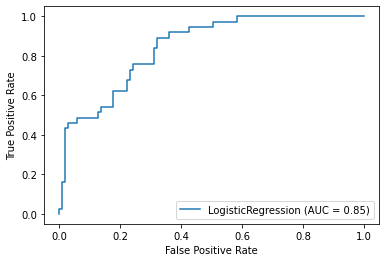

In [33]:
plot_roc_curve(logreg, X_test, y_test)

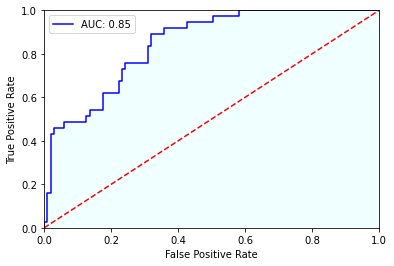

In [34]:
plt.plot(fpr, tpr, 'blue', label= f'AUC: {round(auc_score, 2)}')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr, tpr, 0, facecolor='azure', alpha=1)
plt.legend()
plt.show()

In [35]:
thr_df[(thr_df['TPR']>=0.8) & (thr_df['FPR'] <0.4)]

,TPR,FPR,THR
23,0.837838,0.310680,0.260223
24,0.837838,0.320388,0.253305
25,0.891892,0.320388,0.239033
26,0.891892,0.359223,0.215838
27,0.918919,0.359223,0.215545


In [36]:
y_pred_021 = [1 if prob1 > 0.215545 else 0 for prob1 in logreg.predict_proba(X_test)[:,1]]
make_confusion_matrix(confusion_matrix(y_test, y_pred_021))

,p_0,p_1,total_actual
a_0,66,37,103
a_1,4,33,37
total_prediction,70,70,140


In [37]:
recall_score(y_test, y_pred_021)

0.8918918918918919

In [38]:
print('ratio nasabah yang memberikan keuntungan:', 66/70*100)
print('ratio nasabah yang memberikan kerugian:', 4/70*100)

ratio nasabah yang memberikan keuntungan: 94.28571428571428
ratio nasabah yang memberikan kerugian: 5.714285714285714


In [39]:
print('ratio nasabah yang tidak jadi memberikan keuntungan:', 37/70*100)
print('ratio kerugian yang dapat dikurangi:', 33/70*100)

ratio nasabah yang tidak jadi memberikan keuntungan: 52.85714285714286
ratio kerugian yang dapat dikurangi: 47.14285714285714


In [40]:
make_confusion_matrix(confusion_matrix(y_test, y_pred))

,p_0,p_1,total_actual
a_0,98,5,103
a_1,20,17,37
total_prediction,118,22,140


In [41]:
print('ratio nasabah yang memberikan keuntungan:', 98/118*100)
print('ratio nasabah yang memberikan kerugian:', 20/118*100)

ratio nasabah yang memberikan keuntungan: 83.05084745762711
ratio nasabah yang memberikan kerugian: 16.94915254237288


In [42]:
print('ratio nasabah yang tidak jadi memberikan keuntungan:', 5/22*100)
print('ratio kerugian yang dapat dikurangi:', 17/22*100)

ratio nasabah yang tidak jadi memberikan keuntungan: 22.727272727272727
ratio kerugian yang dapat dikurangi: 77.27272727272727


In [43]:
recall_score(y_test, y_pred)

0.4594594594594595

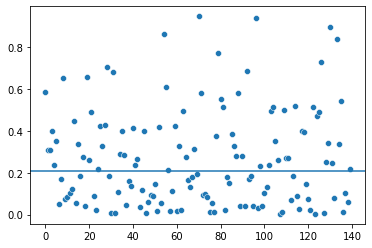

In [44]:
sns.scatterplot(x=range(len(proba_1)), y=proba_1)
plt.axhline(0.21)

In [45]:
y_test['default'].value_counts(normalize=True)

0    0.735714
1    0.264286
Name: default, dtype: float64

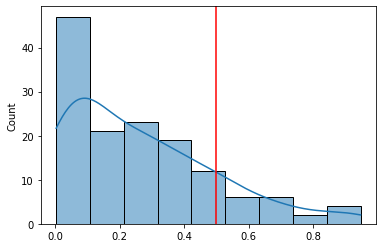

In [46]:
sns.histplot(proba_1, kde=True)
plt.axvline(0.5, color='red')

In [47]:
thr_df[thr_df['TPR']>=0.9]

,TPR,FPR,THR
27,0.918919,0.359223,0.215545
28,0.918919,0.427184,0.180970
29,0.945946,0.427184,0.180324
30,0.945946,0.504854,0.138816
31,0.972973,0.504854,0.132702
32,0.972973,0.582524,0.102397
33,1.000000,0.582524,0.099279
34,1.000000,1.000000,0.003432


In [48]:
y_pred_009 = [1 if prob1 > 0.099279 else 0 for prob1 in logreg.predict_proba(X_test)[:,1]]
make_confusion_matrix(confusion_matrix(y_test, y_pred_009))

,p_0,p_1,total_actual
a_0,43,60,103
a_1,1,36,37
total_prediction,44,96,140


In [49]:
make_confusion_matrix(confusion_matrix(y_test, y_pred))

,p_0,p_1,total_actual
a_0,98,5,103
a_1,20,17,37
total_prediction,118,22,140


> ## P-R Curve

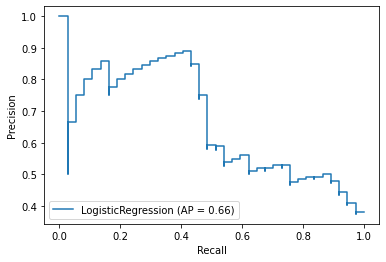

In [50]:
plot_precision_recall_curve(logreg, X_test, y_test)

In [51]:
pr, rc, thrs = precision_recall_curve(y_test, proba_1)
pr_df = pd.DataFrame({'Precision': pr[:-1], 'Recall': rc[:-1], 'Thresholds': thrs})
pr_df

,Precision,Recall,Thresholds
0,0.381443,1.000000,0.099279
1,0.375000,0.972973,0.102397
2,0.378947,0.972973,0.102422
3,0.382979,0.972973,0.103093
4,0.387097,0.972973,0.108954
...,...,...,...
92,0.800000,0.108108,0.839385
93,0.750000,0.081081,0.863196
94,0.666667,0.054054,0.896984
95,0.500000,0.027027,0.936201


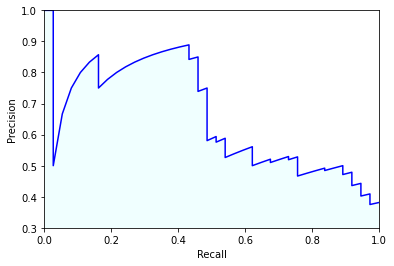

In [52]:
plt.plot(rc, pr, 'blue')
# plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0.3,1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.fill_between(rc, pr, 0, facecolor='azure', alpha=1)
# plt.legend()
plt.show()

In [53]:
pr_df[pr_df['Precision'].between(0.6, 0.8)].sort_values('Recall', ascending=False)

,Precision,Recall,Thresholds
67,0.600000,0.486486,0.425608
68,0.620690,0.486486,0.446007
69,0.642857,0.486486,0.470058
70,0.666667,0.486486,0.489636
71,0.692308,0.486486,0.489714
72,0.720000,0.486486,0.494383
73,0.750000,0.486486,0.494954
74,0.739130,0.459459,0.498525
75,0.772727,0.459459,0.511705
87,0.800000,0.216216,0.682691


In [54]:
y_pred049 = [1 if prob1 > 0.494954 else 0 for prob1 in logreg.predict_proba(X_test)[:,1]]
y_pred049[:5]

[1, 0, 0, 0, 0]

In [55]:
make_confusion_matrix(confusion_matrix(y_test, y_pred049))

,p_0,p_1,total_actual
a_0,97,6,103
a_1,19,18,37
total_prediction,116,24,140


In [56]:
print('ratio nasabah yang memberikan keuntungan:', 97/116*100)
print('ratio nasabah yang memberikan kerugian:', 19/116*100)
print('ratio nasabah yang tidak jadi memberikan keuntungan:', 6/24*100)
print('ratio kerugian yang dapat dihindari:', 18/24*100)

ratio nasabah yang memberikan keuntungan: 83.62068965517241
ratio nasabah yang memberikan kerugian: 16.379310344827587
ratio nasabah yang tidak jadi memberikan keuntungan: 25.0
ratio kerugian yang dapat dihindari: 75.0


In [57]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_009))

,p_0,p_1,total_actual
a_0,43,60,103
a_1,1,36,37
total_prediction,44,96,140


> ## Simple Hyperprameter Tuning

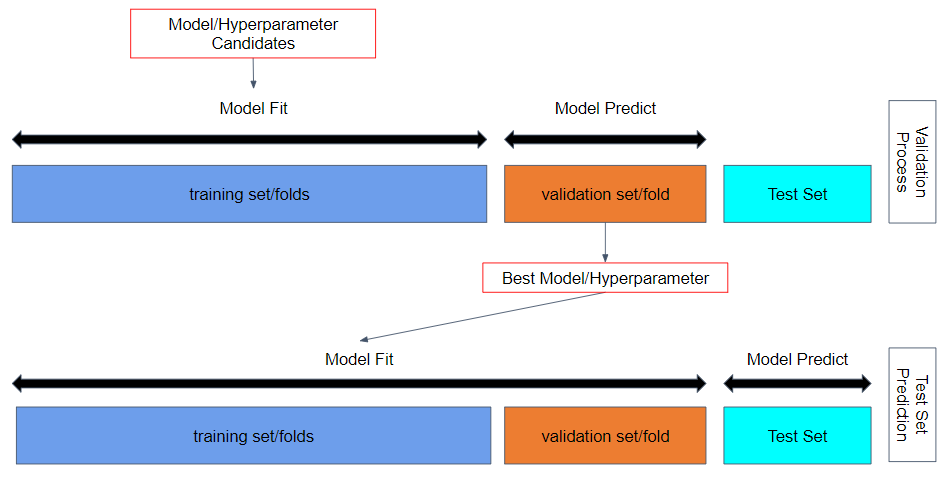

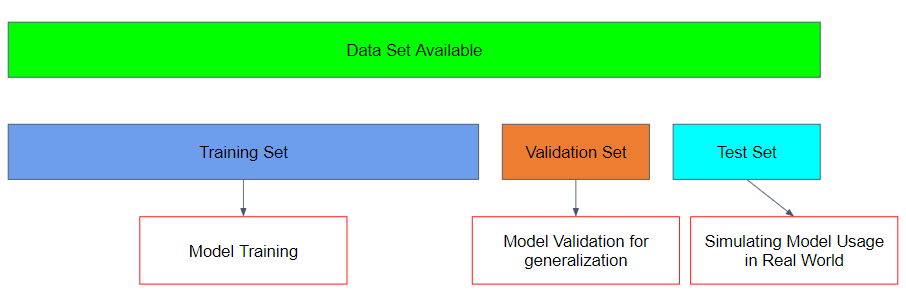

In [58]:
from sklearn.metrics import f1_score

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify = y_train_val, test_size=.25, random_state=2020) 

In [60]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
skfold = StratifiedKFold(n_splits=5)

best_score = 0
cv_score_validation_fold = []

for i in hyperparam_c:
    logreg = LogisticRegression(C=i, solver='liblinear', random_state=2020)
    cv_score = cross_val_score(logreg, X_train_val, y_train_val, cv = skfold, scoring='f1').mean()
    cv_score_validation_fold.append(cv_score)
    
    if cv_score > best_score:
        best_score = cv_score
        best_params = {'C':i}

In [61]:
print('best score', best_score)
print('best params', best_params)

best score 0.5563225088777649
best params {'C': 0.05}


In [62]:
hyperparam_c = [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

training_score = []
val_score = []

for i in hyperparam_c:
    logreg = LogisticRegression(C=i, solver='liblinear', random_state=2020)
    logreg.fit(X_train, y_train)
    
    y_predict_train = logreg.predict(X_train)
    training_score.append(f1_score(y_train, y_predict_train))
    
    y_predict_val = logreg.predict(X_val)
    val_score.append(f1_score(y_val, y_predict_val))

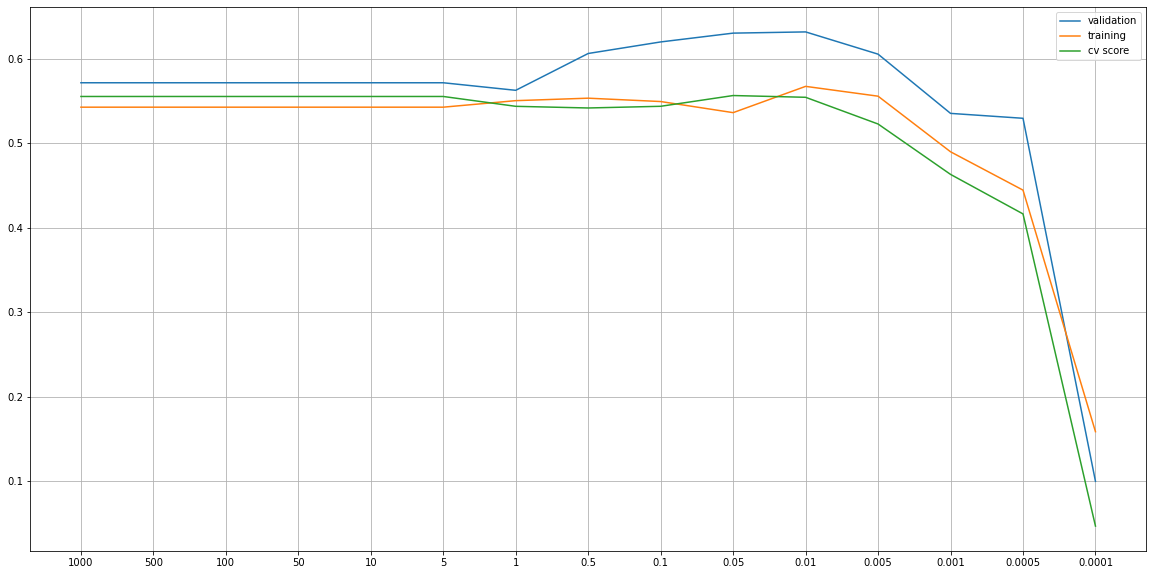

In [63]:
length = range(len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length, val_score)
sns.lineplot(length, training_score)
sns.lineplot(length, cv_score_validation_fold)
plt.legend(['validation', 'training', 'cv score'])
plt.xticks(length,hyperparam_c)
plt.grid()
plt.show()

> ## Final Result Comparison : Simple Hyperparameter Tuning

In [64]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_val, y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



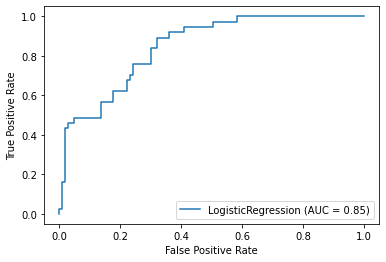

In [65]:
plot_roc_curve(logreg, X_test, y_test)

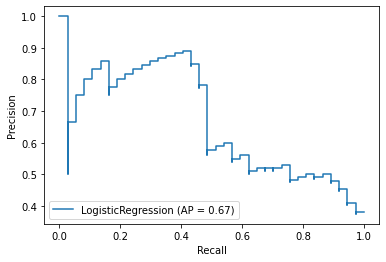

In [66]:
plot_precision_recall_curve(logreg, X_test, y_test)

In [67]:
logreg = LogisticRegression(solver='liblinear', C=0.05)
logreg.fit(X_train_val, y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.68      0.51      0.58        37

    accuracy                           0.81       140
   macro avg       0.76      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



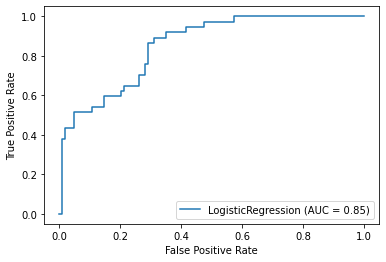

In [68]:
plot_roc_curve(logreg, X_test, y_test)

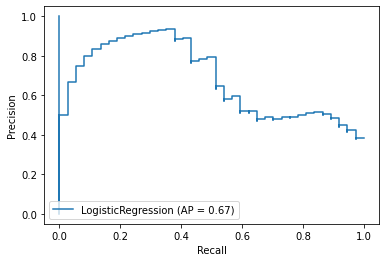

In [69]:
plot_precision_recall_curve(logreg, X_test, y_test)

In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
1. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. changes the model
1. more feature engineering
1. add another hyperprameter, (we are gonna try this)

> ## Grid Search Hyperparameter Tuning

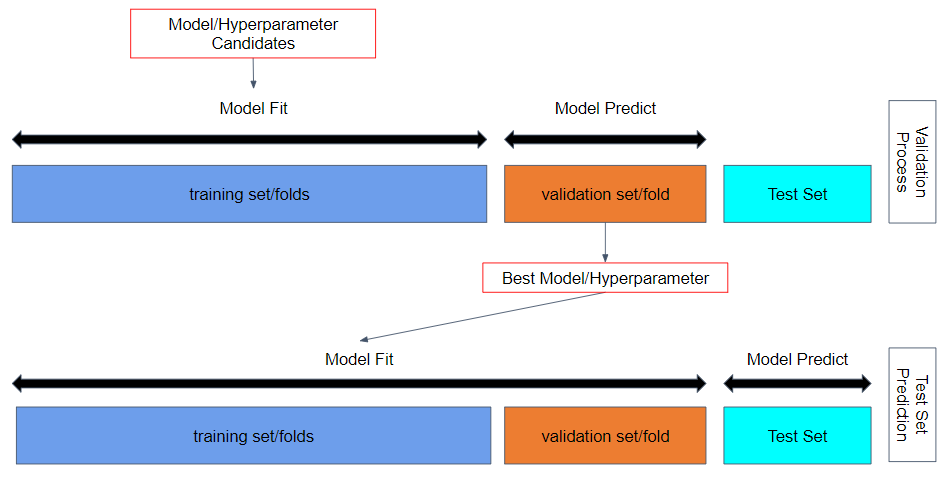

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [72]:
hyperparam_space = {
     'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}

1. C  15 hyperparameters
1. max_iter 6
1. CV 5 fold
<br>
so, this step will train model 15*6*5 = 450 times 

In [73]:
skfold = StratifiedKFold(n_splits=5)

logreg = LogisticRegression(solver='liblinear', random_state=2020)

grid_search = GridSearchCV(
    logreg, # model
    param_grid = hyperparam_space, # pilihan hyperaparameter
    cv = skfold,
    scoring='f1',
    n_jobs=-1,
    verbose = 1
)

In [74]:
grid_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    4.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1', verbose=1)

In [75]:
print('best score', grid_search.best_score_)
print('best params', grid_search.best_params_)

best score 0.5563225088777649
best params {'C': 0.05, 'max_iter': 100}


In [76]:
report_grid = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid[report_grid['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
59,0.008207,0.003486,0.009197,0.008169,0.05,1000,"{'C': 0.05, 'max_iter': 1000}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
57,0.011111,0.007095,0.008996,0.009027,0.05,400,"{'C': 0.05, 'max_iter': 400}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
56,0.006410,0.001005,0.004780,0.000404,0.05,300,"{'C': 0.05, 'max_iter': 300}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
55,0.005613,0.000485,0.006206,0.003522,0.05,200,"{'C': 0.05, 'max_iter': 200}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
54,0.005989,0.000888,0.005305,0.001692,0.05,100,"{'C': 0.05, 'max_iter': 100}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1
58,0.007412,0.001374,0.009873,0.002613,0.05,500,"{'C': 0.05, 'max_iter': 500}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1


This method still resulted in C = 0.05 max_iter = 100 which is basically the same. so no effect in adding max_iter. you can use another method or more FE. 

# Model Performance and Evaluation Method : tips dataset

In [77]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [79]:
X = pd.get_dummies(tips.drop('tip', axis=1))
y = tips['tip']

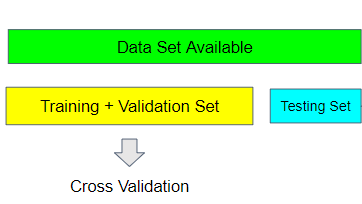

In [80]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

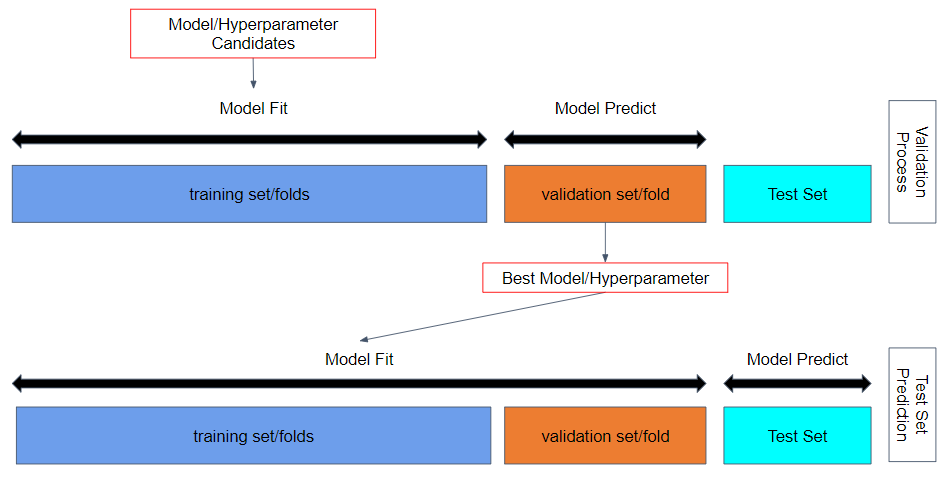

> ## Model Evaluation : Benchmark

In [81]:
dtr = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)
linreg = LinearRegression()

In [82]:
from sklearn.metrics import SCORERS

In [83]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

In [84]:
from sklearn.model_selection import cross_val_score
import warnings

In [85]:
model_cv = cross_val_score(dtr, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [86]:
print('CV Score', model_cv)
print('CV Score Mean', model_cv.mean())
print('CV Score Std', model_cv.std())

CV Score [-1.0686013  -0.97814478 -1.77873212 -1.19898146 -1.19188762]
CV Score Mean -1.2432694552627068
CV Score Std 0.28004351146399903


In [87]:
model_cv = cross_val_score(linreg, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [88]:
print('CV Score', model_cv)
print('CV Score Mean', model_cv.mean())
print('CV Score Std', model_cv.std())

CV Score [-0.87304358 -0.84277215 -1.05989713 -1.77937311 -1.10502143]
CV Score Mean -1.1320214803006683
CV Score Std 0.3393316319526624


In [89]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 2020,
 'splitter': 'best'}

In [90]:
dtr.fit(X_train_val, y_train_val)

DecisionTreeRegressor(max_depth=5, random_state=2020)

In [91]:
y_pred = dtr.predict(X_test)

In [92]:
print(mean_squared_error(y_test, y_pred))

1.4808803946104496


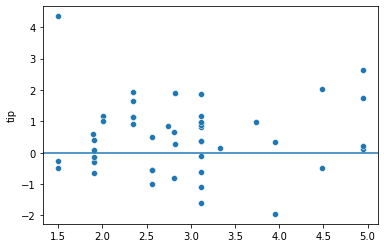

In [93]:
residual = y_test - y_pred

sns.scatterplot(y_pred, residual)
plt.axhline(0)

> ## Hyperparameter Tuning Randomized Search

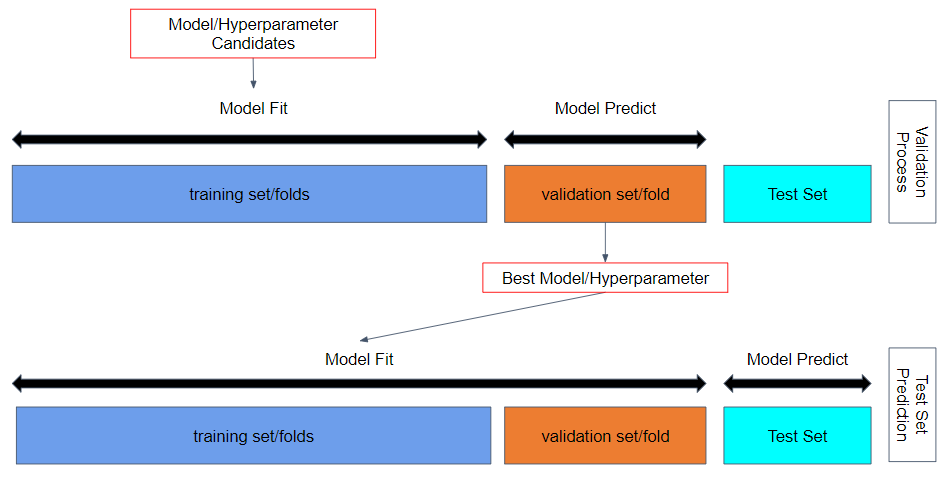

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [95]:
hyperparam_space = {
    'min_samples_leaf':[1,5,10,15,20,50], # benck mark min_samples_leaf = 1
    'max_depth':[2,3,4,5,6,7], # bench mark max_depth = 5
    'criterion':['mse','mae'] # bench mark mse
}

In [96]:
6*6*2

72

In [97]:
dtr.get_params()

randomized_search = RandomizedSearchCV(
    dtr,
    hyperparam_space,
    n_iter = 20,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state=2020,
    n_jobs=-1,
    verbose=1
)

In [98]:
randomized_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             50]},
                   random_state=2020, scoring='neg_mean_squared_error',
                   verbose=1)

In [99]:
print('best score', randomized_search.best_score_)
print('best params', randomized_search.best_params_)

best score -0.9829038972124049
best params {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mse'}


In [100]:
rs_df = pd.DataFrame(randomized_search.cv_results_)
rs_df.sort_values('mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.007580,0.002570,0.004189,0.002396,50,5,mae,"{'min_samples_leaf': 50, 'max_depth': 5, 'crit...",-0.852846,-0.866010,-1.368379,-2.420846,-1.624323,-1.426481,0.578699,20
1,0.006985,0.002185,0.003789,0.000398,5,7,mse,"{'min_samples_leaf': 5, 'max_depth': 7, 'crite...",-1.266981,-0.767827,-1.325200,-2.239966,-1.472244,-1.414444,0.475952,19
2,0.004786,0.000977,0.002793,0.000398,5,4,mse,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",-1.144108,-0.817462,-1.375826,-2.197390,-1.445703,-1.396098,0.456784,18
16,0.006384,0.000798,0.002991,0.000631,15,6,mse,"{'min_samples_leaf': 15, 'max_depth': 6, 'crit...",-0.956966,-0.844012,-1.587474,-2.276566,-1.281531,-1.389310,0.514272,16
11,0.008775,0.001825,0.003989,0.001668,15,7,mse,"{'min_samples_leaf': 15, 'max_depth': 7, 'crit...",-0.956966,-0.844012,-1.587474,-2.276566,-1.281531,-1.389310,0.514272,16
17,0.008976,0.001994,0.004387,0.001016,10,4,mse,"{'min_samples_leaf': 10, 'max_depth': 4, 'crit...",-1.118471,-0.809894,-1.362064,-2.346144,-1.278401,-1.382995,0.517194,15
7,0.005184,0.000394,0.003596,0.000798,5,3,mse,"{'min_samples_leaf': 5, 'max_depth': 3, 'crite...",-0.987999,-0.897975,-1.295115,-2.212884,-1.413923,-1.361579,0.466126,14
5,0.005584,0.001023,0.003192,0.000978,50,7,mse,"{'min_samples_leaf': 50, 'max_depth': 7, 'crit...",-0.879731,-0.900169,-1.479036,-2.103678,-1.437448,-1.360013,0.450628,12
15,0.004389,0.000489,0.002992,0.000630,50,4,mse,"{'min_samples_leaf': 50, 'max_depth': 4, 'crit...",-0.879731,-0.900169,-1.479036,-2.103678,-1.437448,-1.360013,0.450628,12
18,0.008778,0.001597,0.004195,0.001477,15,5,mae,"{'min_samples_leaf': 15, 'max_depth': 5, 'crit...",-0.743851,-1.115824,-1.122205,-2.311428,-1.286546,-1.315971,0.528531,11


> ## Final Result Comparison

In [101]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5)
tree.fit(X_train_val, y_train_val)
y_pred = tree.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.2221933091512662


In [102]:
randomized_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 2020,
 'splitter': 'best'}

In [103]:
randomized_search.best_params_

{'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mse'}

In [104]:
tree_tuned = randomized_search.best_estimator_
tree_tuned.fit(X_train_val, y_train_val)
y_pred_tuned = tree_tuned.predict(X_test)
print(mean_squared_error(y_test, y_pred_tuned))

1.3093536770005814


## __Information/Data Leakage__

In [153]:
rnd = np.random.RandomState(seed = 2020)
X = rnd.normal(size = (100, 10000))
y = rnd.normal(size = (100, ))

In [154]:
X

array([[-1.76884571,  0.07555227, -1.1306297 , ...,  0.0370484 ,
         1.70892684,  2.06128052],
       [-0.18279442,  0.78062368, -1.01220533, ..., -1.44286811,
        -0.10668645,  0.55908184],
       [-0.54253274,  0.07265167, -0.17226138, ..., -0.49330508,
        -0.47407344, -0.29334169],
       ...,
       [ 0.93338682,  0.27188012,  0.49747648, ..., -2.57164168,
        -0.80955447,  0.16828724],
       [-0.77895743,  2.05569239,  1.20271378, ..., -0.60194446,
         1.51537962, -2.04744092],
       [-0.12752166, -1.13585819, -1.16294694, ..., -0.27601388,
        -0.42897267,  0.04324291]])

In [155]:
y

array([-0.05946896,  0.60357316,  0.67587153, -0.85729302, -1.0643326 ,
       -1.30038873, -1.78849941,  2.73855418,  1.49332819, -0.30607635,
       -0.29844391, -0.07927242, -0.51201376, -1.33282679,  0.16344589,
        0.66228175, -0.56970192,  1.62706402, -0.99299357, -0.13520388,
        0.5063996 ,  0.27638705,  0.06015244, -0.90492274,  0.49343128,
        0.22566377, -1.0671462 ,  0.7150381 , -0.2712753 , -1.10219038,
        0.44850701, -1.73148863,  0.21773547, -0.16028807,  0.30393715,
        0.03203427,  0.17067754,  0.52077502, -0.13380675,  0.32312826,
        0.17838559, -2.28715647, -1.36533077, -1.03386953, -0.16109467,
       -0.55439017,  1.81311008, -0.53516705,  1.09534495, -1.04778576,
       -1.02621724, -0.33369092, -0.10245247, -1.99371985,  1.06603323,
       -0.07122426, -0.55492333, -0.26698675, -0.24229773,  0.72289311,
        1.90565415,  0.02591026,  0.47655674, -1.13981724, -0.80306498,
       -0.20943094, -0.71330204, -1.61530384,  1.51375687, -0.79

In [106]:
X.shape

(100, 10000)

In [107]:
y.shape

(100,)

Data generated with condition that there is no relationship between X and y

In [108]:
x_df = pd.DataFrame(X)
x_df['y'] = y

In [109]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X,y)
X_selected = select.transform(X)
X_selected.shape

(100, 500)

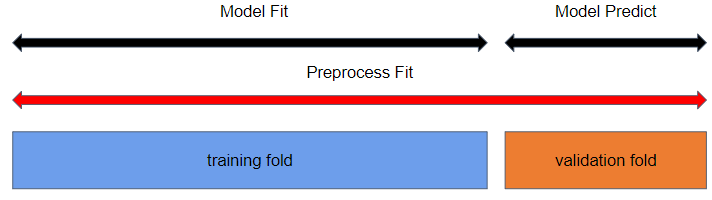

In [110]:
from sklearn.linear_model import Ridge

In [111]:
cross_val_score(Ridge(), X_selected, y, cv=5)

array([0.92165345, 0.89445668, 0.92827414, 0.93088559, 0.91044624])

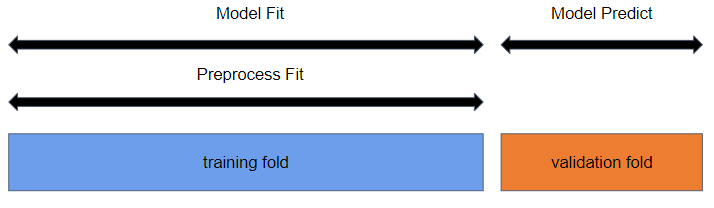

In [112]:
# ridge = Ridge().fit(X_selected, y)
# ridge.score(X_selected, y)

In [113]:
from sklearn.pipeline import Pipeline

In [114]:
pipe = Pipeline([
    ('select', select),
    ('ridge', Ridge())
])

In [115]:
cross_val_score(pipe, X, y, cv=5)

array([-0.0330359 , -0.07840338, -0.06731106, -0.04544685, -0.07314928])

this is what the result should be the R-square is vary small or even negative. Information leakege show that the model can have overly optimistic result to validation folds.

## Algorithm Chains: Adults Dataset

In [116]:
df_adult = pd.read_csv('adult.csv')

In [117]:
df_adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [118]:
df_adult.replace('?', np.nan, inplace=True)

In [119]:
df_adult.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

> ## Preprocessing

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [121]:
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NC')),
    ('binary', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('one_hot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary_encoder', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

In [122]:
X = df_adult.drop(columns=['fnlwgt', 'income', 'education'])
y = np.where(df_adult['income']=='>50K',1,0)

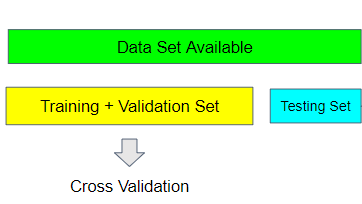

In [123]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify=y,
    random_state=2020
)

In [124]:
pd.Series(y).value_counts(normalize=True)

0    0.75919
1    0.24081
dtype: float64

In [125]:
pd.Series(y_train_val).value_counts(normalize=True)

0    0.759173
1    0.240827
dtype: float64

In [126]:
pd.Series(y_test).value_counts(normalize=True)

0    0.759243
1    0.240757
dtype: float64

> ## Model Evaluation : Benchmark

In [127]:
skfold = StratifiedKFold(n_splits=5)
tree = DecisionTreeClassifier(random_state=2020) # benchmark entropy, 5, random_state = 2020

estimator = Pipeline([
    ('preprocess', transformer),
    ('clf', tree)
])

In [128]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring='f1', cv=skfold)

In [129]:
print('CV Score', model_cv)
print('CV Score Mean', model_cv.mean())
print('CV Score Standard Deviation', model_cv.std())

CV Score [0.60702341 0.63231441 0.58983348 0.61254296 0.6104626 ]
CV Score Mean 0.6104353718525161
CV Score Standard Deviation 0.013558867413472207


FLEXIBLE METRICS

In [130]:
def model_evaluation_cv(model, metric, transformer):
    skfold = StratifiedKFold(n_splits=5)

    estimator = Pipeline([
        ('preprocess', transformer),
        ('clf', model)
    ])
    
    model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring=metric, cv=skfold)
    print('CV Score', model_cv)
    print('CV Score Mean', model_cv.mean())
    print('CV Score Standard Deviation', model_cv.std())
    
    return model_cv

In [131]:
model = LogisticRegression(solver='liblinear', random_state=2020)
metric = 'f1'
trans = transformer

logit_cv = model_evaluation_cv(model, metric, trans)

CV Score [0.60656541 0.66446748 0.63331714 0.64336325 0.6657277 ]
CV Score Mean 0.6426881972553019
CV Score Standard Deviation 0.021901069053451787


In [132]:
model = DecisionTreeClassifier(random_state=2020)
metric = 'f1'
trans = transformer

dtr_cv = model_evaluation_cv(model, metric, trans)

CV Score [0.60702341 0.63231441 0.58983348 0.61254296 0.6104626 ]
CV Score Mean 0.6104353718525161
CV Score Standard Deviation 0.013558867413472207


In [133]:
logit = LogisticRegression(solver = 'liblinear', random_state=2020)

estimator = Pipeline([
    ('preprocess',transformer),
    ('clf',logit)
])

estimator.fit(X_train_val, y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary_encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marita

In [134]:
y_pred = estimator.predict(X_test)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



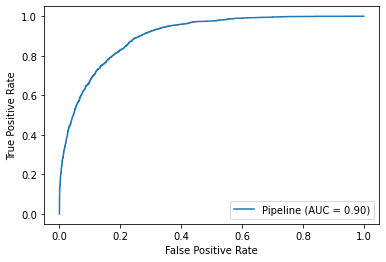

In [136]:
plot_roc_curve(estimator, X_test, y_test)

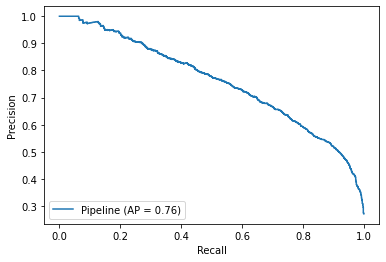

In [137]:
plot_precision_recall_curve(estimator, X_test, y_test)

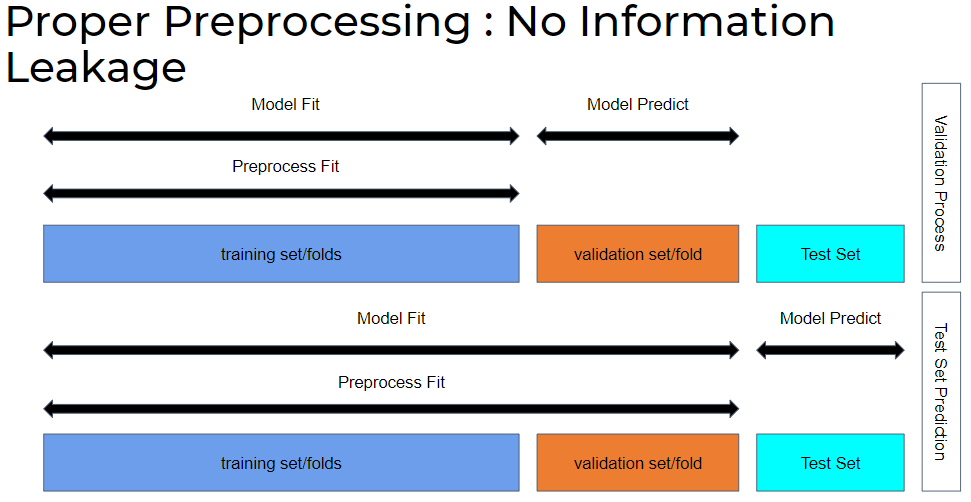

In [138]:
logit = LogisticRegression(solver = 'liblinear', random_state=2020)

estimator = Pipeline([
    ('preprocess',transformer),
    ('clf',logit)
])

# estimator.get_params()

hyperparam_space = {
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear', 'newton-cg']
}

skfold = StratifiedKFold(n_splits=5)

gridsearch = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs=-1,
    verbose=1
)

In [139]:
gridsearch.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   41.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary_encoder',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='NC',
                              

In [140]:
print('best_score', gridsearch.best_score_)
print('best_score', gridsearch.best_params_)

best_score 0.6460237640462658
best_score {'clf__C': 100, 'clf__solver': 'newton-cg'}


In [141]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.189992,0.257521,0.392846,0.194380,100,liblinear,"{'clf__C': 100, 'clf__solver': 'liblinear'}",0.606654,0.660085,0.632089,0.642185,0.665728,0.641348,0.021145,7
1,24.828967,4.733077,0.130634,0.022474,100,newton-cg,"{'clf__C': 100, 'clf__solver': 'newton-cg'}",0.625773,0.665730,0.628846,0.642790,0.666980,0.646024,0.017568,1
2,2.244049,0.175783,0.238291,0.159928,10,liblinear,"{'clf__C': 10, 'clf__solver': 'liblinear'}",0.618005,0.661343,0.631120,0.640535,0.665728,0.643346,0.018024,5
3,18.797713,4.255805,0.119302,0.027949,10,newton-cg,"{'clf__C': 10, 'clf__solver': 'newton-cg'}",0.625119,0.665730,0.628846,0.643093,0.666980,0.645954,0.017710,2
4,2.623339,0.255840,0.121617,0.008051,1,liblinear,"{'clf__C': 1, 'clf__solver': 'liblinear'}",0.606565,0.664467,0.633317,0.643363,0.665728,0.642688,0.021901,6
5,10.780075,0.906421,0.109721,0.007755,1,newton-cg,"{'clf__C': 1, 'clf__solver': 'newton-cg'}",0.624762,0.664477,0.627526,0.642756,0.666353,0.645175,0.017636,3
6,2.228538,0.233093,0.141345,0.052751,0.1,liblinear,"{'clf__C': 0.1, 'clf__solver': 'liblinear'}",0.601779,0.646301,0.629720,0.637363,0.644068,0.631846,0.016108,8
7,10.799639,1.685348,0.115515,0.061766,0.1,newton-cg,"{'clf__C': 0.1, 'clf__solver': 'newton-cg'}",0.622778,0.661633,0.623188,0.644550,0.664775,0.643385,0.018025,4
8,2.189850,0.554813,0.101146,0.013480,0.01,liblinear,"{'clf__C': 0.01, 'clf__solver': 'liblinear'}",0.578785,0.587368,0.562803,0.584631,0.588912,0.580500,0.009499,10
9,8.388975,1.690333,0.093258,0.025922,0.01,newton-cg,"{'clf__C': 0.01, 'clf__solver': 'newton-cg'}",0.615007,0.636719,0.605144,0.625490,0.652724,0.627017,0.016613,9


BENCHMARK MODEL

In [142]:
estimator

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary_encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marita

In [143]:
estimator.fit(X_train_val, y_train_val)
y_pred = estimator.predict(X_test)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [145]:
make_confusion_matrix(confusion_matrix(y_test, y_pred))

,p_0,p_1,total_actual
a_0,5762,419,6181
a_1,807,1153,1960
total_prediction,6569,1572,8141


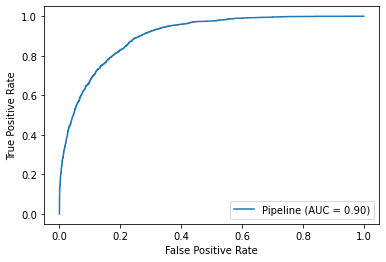

In [146]:
plot_roc_curve(estimator, X_test, y_test)

TUNED MODEL

In [147]:
# tuned_logit.fit(X_train_val, y_train_val)
tuned_logit = gridsearch.best_estimator_.fit(X_train_val, y_train_val)

In [148]:
y_pred_tuned = tuned_logit.predict(X_test)

In [149]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.60      0.66      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



In [150]:
make_confusion_matrix(confusion_matrix(y_test, y_pred_tuned))

,p_0,p_1,total_actual
a_0,5742,439,6181
a_1,787,1173,1960
total_prediction,6529,1612,8141


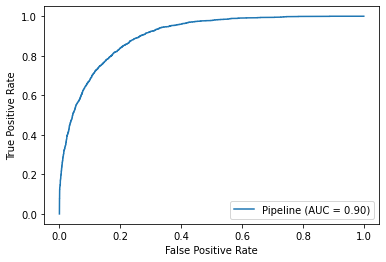

In [151]:
plot_roc_curve(tuned_logit, X_test, y_test)